### Task 1-

In [1]:
import pandas as pd #Imported pandas library

In [2]:
df=pd.read_csv("device_features.csv") #Read the csv file
df.head(2)

,oem_id,brand,model,released_date,announced_date,hardware_designer,manufacturer,codename,general_extras,device_category,...,usb_connector,max_charging_power,bluetooth,WLAN,additional_sensors,battery_capacity,market_regions,info_added_date,x_resolution,y_resolution
0,A135UZKAUSC,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,02-08-23 18:10,1080,2408
1,A135UZKDXAA,Samsung,SM-A135U1/DS Galaxy A13 2022 Standard Edition ...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,USB C reversible,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,01-08-23 09:00,1080,2408


In [3]:
df['price_currency'].unique() # Checking the different kinds of currencies in the dataframe

array(['USD', 'JPY', 'MXN', 'BRL', 'EUR', 'INR', 'GBP', 'CNY', 'TWD',
       'THB', 'CAD', 'SGD', 'IDR', 'AED', 'TRY', 'MYR', 'HKD', 'AUD',
       'KRW', 'CHF', 'ARS', 'KZT', 'HUF', 'PLN', 'RUB'], dtype=object)

In [4]:
# Creating a dictionary containing conversion rates to convert from X currency to USD
exchange_rates = {'USD': 1, 'CNY': 0.14 , 'EUR': 1.11 , 'INR': 0.012 , 'GBP': 1.28 , 'CAD': 0.76 , 'JPY': 0.0071 , 'MXN': 0.059 , 'KRW': 0.00077 , 'AUD': 0.68 , 'TWD': 0.033 , 'BRL': 0.21 , 'RUB': 0.011 , 'KZT': 0.0022 , 'HKD': 0.13 , 'IDR': 0.000065 , 'AED': 0.27 , 'MYR': 0.22 , 'SGD': 0.76 , 'TRY': 0.034 , 'HUF': 0.0029 , 'PLN': 0.25 , 'THB': 0.029 , 'CHF': 1.19 , 'ARS': 0.0012 }

In [5]:
# Creating a function which converts X currency to usd using the dictionary created above 
def converted_currency(row):
    price_in_usd=row['price']*exchange_rates[row["price_currency"]]
    return price_in_usd
    
    
converted_currency(df.loc[3]) # Test case

247.08

In [6]:
# Passing each row to the function so that the currency conversion can take place and storing the outputs in a new column.
df['price_in_usd']=df.apply(lambda x:converted_currency(x), axis=1)
df.head(2)

,oem_id,brand,model,released_date,announced_date,hardware_designer,manufacturer,codename,general_extras,device_category,...,max_charging_power,bluetooth,WLAN,additional_sensors,battery_capacity,market_regions,info_added_date,x_resolution,y_resolution,price_in_usd
0,A135UZKAUSC,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,02-08-23 18:10,1080,2408,199.0
1,A135UZKDXAA,Samsung,SM-A135U1/DS Galaxy A13 2022 Standard Edition ...,28-03-22,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,15.0,Bluetooth 5.0,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,01-08-23 09:00,1080,2408,199.0


In [7]:
# Grouping by 2 columns and finding the mean of the the price in usd column 
df1=pd.DataFrame(df.groupby(['brand','device_category'])['price_in_usd'].mean().reset_index()) # Creating a new dataframe so that accessing the mean price is then easy
df1.rename({'price_in_usd':'Mean_in_usd'},axis=1,inplace=True) # Renamed the column
df1.head()

,brand,device_category,Mean_in_usd
0,Apple,Smartphone,1236.761940
1,Apple,Smartwatch,353.242500
2,Apple,Tablet,1479.663796
3,Asus,Smartphone,972.652229
4,BBK,Smartphone,623.952000


In [8]:
"""
Creating a function that takes the brand and device type entered and prints the corresponding mean price.
Edge cases of brand entered not available and subsquently the device type unavailable for that brand is also considered
If all the conditions satisfy then the corresponding mean price is obtained and printed
"""
def average_price(brand,device_type):
    if(df1['brand'].eq(brand).any() == False):
        print(f'{brand} data not available')
    elif(df1['brand'].eq(brand).any() == True and df1['device_category'].eq(device_type).any() == False):
        print(f'{device_type} not available for {brand} brand')
    else:
        mean_price=df1[ (df1['brand'] == brand) & (df1['device_category'] == device_type) ]['Mean_in_usd'].iloc[0] 
        print(f'Mean price of {brand} {device_type} is ${mean_price} ')

In [9]:
average_price('Samsung','Tablet') #Example of user input.

Mean price of Samsung Tablet is $527.1983333333334 


### Task 2-


In [10]:
import matplotlib.pyplot as plt #Importing matplotlib

In [11]:
df['released_date'].dtype

dtype('O')

In [12]:
# Converted the object type of released_date to datetime
df['released_date']=pd.to_datetime(df['released_date'], format='%d-%m-%y') 

In [13]:
df['year']=df['released_date'].dt.year # Created a year column by extracting the year from released_date 
df['month']=df['released_date'].dt.month # Created a month column by extracting the month from released_date
df.head(2)

,oem_id,brand,model,released_date,announced_date,hardware_designer,manufacturer,codename,general_extras,device_category,...,WLAN,additional_sensors,battery_capacity,market_regions,info_added_date,x_resolution,y_resolution,price_in_usd,year,month
0,A135UZKAUSC,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,2022-03-28,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,02-08-23 18:10,1080,2408,199.0,2022,3
1,A135UZKDXAA,Samsung,SM-A135U1/DS Galaxy A13 2022 Standard Edition ...,2022-03-28,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,"802.11a,802.11b,802.11g,802.11n,802.11ac","FP sensor,L sensor,P sensor",5000 mAh battery,North America,01-08-23 09:00,1080,2408,199.0,2022,3


In [14]:
# Converted the price in used to gbp by multiplying each row by 0.78(as 1gbp = 0.78 usd) and stored the value in a new column.
df['price_in_gbp']=df['price_in_usd'].apply(lambda x: x*0.78)
df.head(2)

,oem_id,brand,model,released_date,announced_date,hardware_designer,manufacturer,codename,general_extras,device_category,...,additional_sensors,battery_capacity,market_regions,info_added_date,x_resolution,y_resolution,price_in_usd,year,month,price_in_gbp
0,A135UZKAUSC,Samsung,SM-A135U Galaxy A13 2022 Standard Edition TD-L...,2022-03-28,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,"FP sensor,L sensor,P sensor",5000 mAh battery,North America,02-08-23 18:10,1080,2408,199.0,2022,3,155.22
1,A135UZKDXAA,Samsung,SM-A135U1/DS Galaxy A13 2022 Standard Edition ...,2022-03-28,04-03-22,Samsung Electronics,Samsung Electronics,Samsung A135,Haptic touch feedback,Smartphone,...,"FP sensor,L sensor,P sensor",5000 mAh battery,North America,01-08-23 09:00,1080,2408,199.0,2022,3,155.22


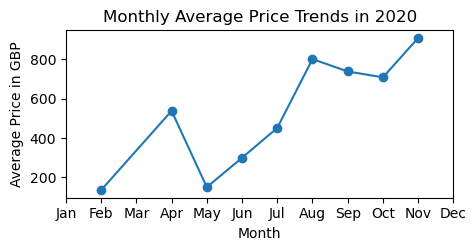

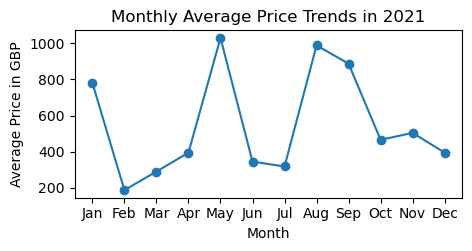

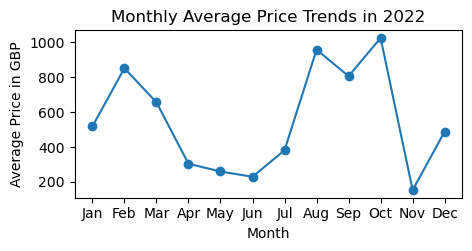

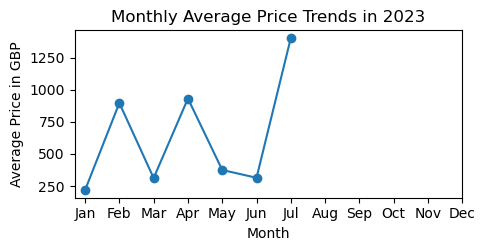

In [15]:
# Made a for loop for plotting a line graph with appropriate labels and title for years in 2020,2021,2022 and 2023

i=1

for year in [2020,2021,2022,2023]:
    
    year_df = df[df['year'] == year] # Created a dataframe with the years only in the above range
    avg_price_per_month =year_df.groupby(['month'])['price_in_gbp'].mean() # Grouped by month and mean of price in gbp found
   
    plt.figure(figsize=(5,10)) #Setting the figure size
    plt.subplot(4,1,i) #Making 4 subplots in 4 rows, 1 column format
    plt.plot(avg_price_per_month.index, avg_price_per_month.values, marker='o', linestyle='-') # Plot line graph of solid line style
    plt.title(f'Monthly Average Price Trends in {year}') #Title for each graph
    plt.xlabel('Month') #Setting the x and y labels
    plt.ylabel('Average Price in GBP')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Setting the x axis labels/ticks
    plt.show() #Displays the graph
    i=i+1 #Increments i by 1 so that next subplot can be printed.